# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import tensorflow.keras as keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
Build your own model
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad,Adam

Optimizers = [SGD, RMSprop, Adagrad, Adam]

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
LR = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for opt in Optimizers:
    keras.backend.clear_session() # 把舊的 Graph 清掉
#     print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt(lr=LR))
#     model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    results[opt] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 68us/s

50000/50000 [==============================] - 3s 61us/sample - loss: 1.6980 - accuracy: 0.4075 - val_loss: 1.7036 - val_accuracy: 0.4048
Epoch 49/50
50000/50000 [==============================] - 3s 61us/sample - loss: 1.6947 - accuracy: 0.4095 - val_loss: 1.6991 - val_accuracy: 0.4096
Epoch 50/50
50000/50000 [==============================] - 3s 60us/sample - loss: 1.6911 - accuracy: 0.4105 - val_loss: 1.6957 - val_accuracy: 0.4074
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dens

50000/50000 [==============================] - 4s 80us/sample - loss: 0.8391 - accuracy: 0.6973 - val_loss: 1.8370 - val_accuracy: 0.4864
Epoch 46/50
50000/50000 [==============================] - 4s 79us/sample - loss: 0.8287 - accuracy: 0.7032 - val_loss: 1.8404 - val_accuracy: 0.4821
Epoch 47/50
50000/50000 [==============================] - 4s 79us/sample - loss: 0.8165 - accuracy: 0.7077 - val_loss: 1.9179 - val_accuracy: 0.4793
Epoch 48/50
50000/50000 [==============================] - 4s 79us/sample - loss: 0.8058 - accuracy: 0.7101 - val_loss: 1.8450 - val_accuracy: 0.4932
Epoch 49/50
50000/50000 [==============================] - 4s 78us/sample - loss: 0.7934 - accuracy: 0.7120 - val_loss: 1.8314 - val_accuracy: 0.4882
Epoch 50/50
50000/50000 [==============================] - 4s 79us/sample - loss: 0.7848 - accuracy: 0.7176 - val_loss: 1.9704 - val_accuracy: 0.4803
Model: "model"
_________________________________________________________________
Layer (type)                 Ou

50000/50000 [==============================] - 4s 75us/sample - loss: 1.5318 - accuracy: 0.4666 - val_loss: 1.5548 - val_accuracy: 0.4538
Epoch 43/50
50000/50000 [==============================] - 4s 75us/sample - loss: 1.5272 - accuracy: 0.4678 - val_loss: 1.5593 - val_accuracy: 0.4536
Epoch 44/50
50000/50000 [==============================] - 4s 76us/sample - loss: 1.5230 - accuracy: 0.4703 - val_loss: 1.5437 - val_accuracy: 0.4579
Epoch 45/50
50000/50000 [==============================] - 4s 76us/sample - loss: 1.5183 - accuracy: 0.4713 - val_loss: 1.5508 - val_accuracy: 0.4522
Epoch 46/50
50000/50000 [==============================] - 4s 75us/sample - loss: 1.5151 - accuracy: 0.4733 - val_loss: 1.5524 - val_accuracy: 0.4544
Epoch 47/50
50000/50000 [==============================] - 4s 76us/sample - loss: 1.5110 - accuracy: 0.4737 - val_loss: 1.5358 - val_accuracy: 0.4571
Epoch 48/50
50000/50000 [==============================] - 4s 77us/sample - loss: 1.5074 - accuracy: 0.4759 - va

50000/50000 [==============================] - 3s 52us/sample - loss: 0.8086 - accuracy: 0.7116 - val_loss: 1.5523 - val_accuracy: 0.5198
Epoch 40/50
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7860 - accuracy: 0.7206 - val_loss: 1.5519 - val_accuracy: 0.5238
Epoch 41/50
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7706 - accuracy: 0.7235 - val_loss: 1.5788 - val_accuracy: 0.5273
Epoch 42/50
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7600 - accuracy: 0.7286 - val_loss: 1.5702 - val_accuracy: 0.5246
Epoch 43/50
50000/50000 [==============================] - 3s 53us/sample - loss: 0.7572 - accuracy: 0.7282 - val_loss: 1.6078 - val_accuracy: 0.5206
Epoch 44/50
50000/50000 [==============================] - 3s 53us/sample - loss: 0.7270 - accuracy: 0.7410 - val_loss: 1.6264 - val_accuracy: 0.5155
Epoch 45/50
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7151 - accuracy: 0.7439 - va

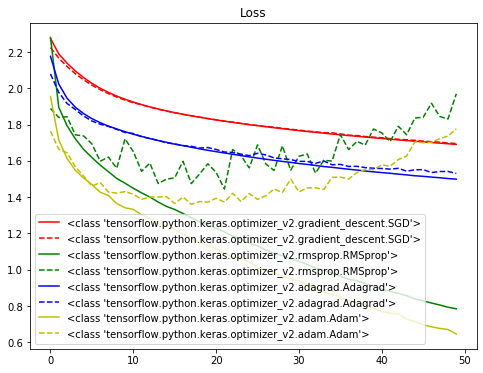

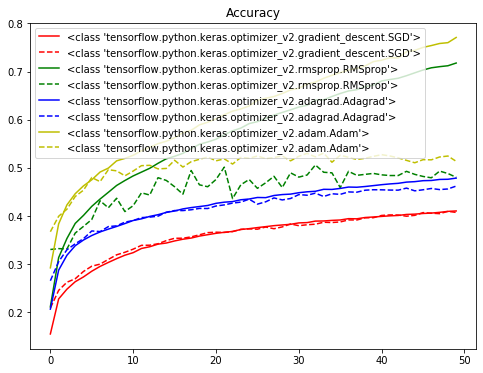

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()